# Gibbs sampling for Bayesian Binary Probit

## 0.1 Introduction

### 0.1.1 Generate synthetic data

In [20]:
# Set seed for reproducible results
set.seed(250)

In [21]:
# Create 400 covariate data x which lie between (-1, 1)
(N <- 400)
(x <- seq(-1, 1, length.out = N))

[1] 400

[1] -1.000000000 -0.994987469 -0.989974937 -0.984962406 -0.979949875
  [6] -0.974937343 -0.969924812 -0.964912281 -0.959899749 -0.954887218
 [11] -0.949874687 -0.944862155 -0.939849624 -0.934837093 -0.929824561
 [16] -0.924812030 -0.919799499 -0.914786967 -0.909774436 -0.904761905
 [21] -0.899749373 -0.894736842 -0.889724311 -0.884711779 -0.879699248
 [26] -0.874686717 -0.869674185 -0.864661654 -0.859649123 -0.854636591
 [31] -0.849624060 -0.844611529 -0.839598997 -0.834586466 -0.829573935
 [36] -0.824561404 -0.819548872 -0.814536341 -0.809523810 -0.804511278
 [41] -0.799498747 -0.794486216 -0.789473684 -0.784461153 -0.779448622
 [46] -0.774436090 -0.769423559 -0.764411028 -0.759398496 -0.754385965
 [51] -0.749373434 -0.744360902 -0.739348371 -0.734335840 -0.729323308
 [56] -0.724310777 -0.719298246 -0.714285714 -0.709273183 -0.704260652
 [61] -0.699248120 -0.694235589 -0.689223058 -0.684210526 -0.679197995
 [66] -0.674185464 -0.669172932 -0.664160401 -0.659147870 -0.654135338
 [71] -0.649122807 -0.644110276 -0.639097744 -0.634085213 -0.629072682
 [76] -0.624060150 -0.619047619 -0.614035088 -0.609022556 -0.604010025
 [81] -0.598997494 -0.593984962 -0.588972431 -0.583959900 -0.578947368
 [86] -0.573934837 -0.568922306 -0.563909774 -0.558897243 -0.553884712
 [91] -0.548872180 -0.543859649 -0.538847118 -0.533834586 -0.528822055
 [96] -0.523809524 -0.518796992 -0.513784461 -0.508771930 -0.503759398
[101] -0.498746867 -0.493734336 -0.488721805 -0.483709273 -0.478696742
[106] -0.473684211 -0.468671679 -0.463659148 -0.458646617 -0.453634085
[111] -0.448621554 -0.443609023 -0.438596491 -0.433583960 -0.428571429
[116] -0.423558897 -0.418546366 -0.413533835 -0.408521303 -0.403508772
[121] -0.398496241 -0.393483709 -0.388471178 -0.383458647 -0.378446115
[126] -0.373433584 -0.368421053 -0.363408521 -0.358395990 -0.353383459
[131] -0.348370927 -0.343358396 -0.338345865 -0.333333333 -0.328320802
[136] -0.323308271 -0.318295739 -0.313283208 -0.308270677 -0.303258145
[141] -0.298245614 -0.293233083 -0.288220551 -0.283208020 -0.278195489
[146] -0.273182957 -0.268170426 -0.263157895 -0.258145363 -0.253132832
[151] -0.248120301 -0.243107769 -0.238095238 -0.233082707 -0.228070175
[156] -0.223057644 -0.218045113 -0.213032581 -0.208020050 -0.203007519
[161] -0.197994987 -0.192982456 -0.187969925 -0.182957393 -0.177944862
[166] -0.172932331 -0.167919799 -0.162907268 -0.157894737 -0.152882206
[171] -0.147869674 -0.142857143 -0.137844612 -0.132832080 -0.127819549
[176] -0.122807018 -0.117794486 -0.112781955 -0.107769424 -0.102756892
[181] -0.097744361 -0.092731830 -0.087719298 -0.082706767 -0.077694236
[186] -0.072681704 -0.067669173 -0.062656642 -0.057644110 -0.052631579
[191] -0.047619048 -0.042606516 -0.037593985 -0.032581454 -0.027568922
[196] -0.022556391 -0.017543860 -0.012531328 -0.007518797 -0.002506266
[201]  0.002506266  0.007518797  0.012531328  0.017543860  0.022556391
[206]  0.027568922  0.032581454  0.037593985  0.042606516  0.047619048
[211]  0.052631579  0.057644110  0.062656642  0.067669173  0.072681704
[216]  0.077694236  0.082706767  0.087719298  0.092731830  0.097744361
[221]  0.102756892  0.107769424  0.112781955  0.117794486  0.122807018
[226]  0.127819549  0.132832080  0.137844612  0.142857143  0.147869674
[231]  0.152882206  0.157894737  0.162907268  0.167919799  0.172932331
[236]  0.177944862  0.182957393  0.187969925  0.192982456  0.197994987
[241]  0.203007519  0.208020050  0.213032581  0.218045113  0.223057644
[246]  0.228070175  0.233082707  0.238095238  0.243107769  0.248120301
[251]  0.253132832  0.258145363  0.263157895  0.268170426  0.273182957
[256]  0.278195489  0.283208020  0.288220551  0.293233083  0.298245614
[261]  0.303258145  0.308270677  0.313283208  0.318295739  0.323308271
[266]  0.328320802  0.333333333  0.338345865  0.343358396  0.348370927
[271]  0.353383459  0.358395990  0.363408521  0.368421053  0.373433584
[276]  0.378446115  0.383458647  0.388471178  0.393483709  0.398496241
[281]  0.403508772  0.4085

In [22]:
# Create n x D design matrix
D <- 2
# We learn a linear function
(X <- matrix(c(rep(1, N), x), ncol = D))

1,-1.0000000
1,-0.9949875
1,-0.9899749
1,-0.9849624
1,-0.9799499
1,-0.9749373
1,-0.9699248
1,-0.9649123
1,-0.9598997
1,-0.9548872
1,-0.9498747


In [23]:
# True values of regression coeffiecients theta
(true_theta <- c(-.5, 3.3))

[1] -0.5  3.3

In [24]:
# Obtain the vector with probabilities of success p using the probit link
(p <- pnorm(X %*% true_theta))

7.234804e-05
7.733202e-05
8.263786e-05
8.828482e-05
9.429319e-05
1.006843e-04
1.074808e-04
1.147063e-04
1.223858e-04
1.305456e-04
1.392134e-04


In [25]:
# Generate binary observation data y
(y <- rbinom(N, 1, p))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[149] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
[186] 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
[223] 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
[260] 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
[297] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [26]:
length(y)

[1] 400

In [27]:
# Variables that we will need later
(N1  <- sum(y))  # Number of successes
(N0  <- N - N1)  # Number of failures

[1] 169

[1] 231

## 0.2 MLE for Binary Probit Regression

In [28]:
# Fit the model to the data
(fit <- glm(y ~ x, family = binomial(link = probit)))


Call:  glm(formula = y ~ x, family = binomial(link = probit))

Coefficients:
(Intercept)            x  
     -0.512        3.237  

Degrees of Freedom: 399 Total (i.e. Null);  398 Residual
Null Deviance:	    544.9 
Residual Deviance: 220.1 	AIC: 224.1

In [29]:
# MLE estimates of the regression coefficients
# (Intercept)           x 
#  -0.5490056   3.1296282
(mle_theta <- fit$coefficients)

(Intercept)           x 
 -0.5119719   3.2372680

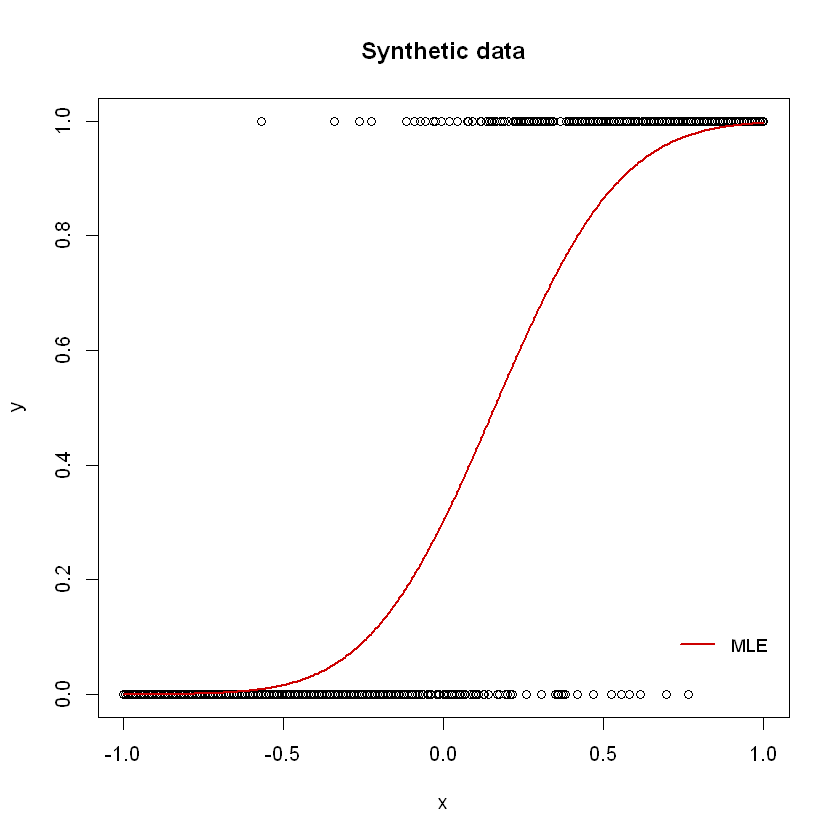

In [30]:
# Plot covariates x versus observations y
plot(x, y, main = "Synthetic data")

# Show the fitted function using the MLE estimates
lines(x = x, y = pnorm(X %*% mle_theta), col = "red3", lwd = 2)
legend("bottomright", legend = "MLE", col = "red3", bty = 'n', 
       lty = 1, lwd = 2, inset = c(0.02, 0.08), cex = 0.9)

## 0.3 Bayesian Binary Probit Regression

### 0.3.1 Augmented Model

### 0.3.2 Gibbs sampling scheme

### 0.3.3 Gibbs sampling implementation

In [31]:
# Library for sampling from Multivariate Normal distribution
require(mvtnorm)
# Library for sampling from Truncated Normal distribution
require(truncnorm)

In [32]:
# Conjugate prior on the coefficients \theta ~ N(theta_0, Q_0)
(theta_0 <- rep(0, D))
(Q_0 <- diag(10, D))

[1] 0 0

10,0
0,10


In [33]:
# Initialize parameters
(theta <- rep(0, D))
(z <- rep(0, N))

[1] 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [34]:
# Number of simulations for Gibbs sampler
N_sim <- 10000 
# Burn in period
burn_in <- 5000
# Matrix storing samples of the \theta parameter
(theta_chain <- matrix(0, nrow = N_sim, ncol = D))

0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0


In [35]:
# Gibbs sampling algorithm

In [36]:
# Compute posterior variance of theta
(prec_0 <- solve(Q_0))
(V <- solve(prec_0 + crossprod(X, X)))

0.1,0.0
0.0,0.1


2.499375e-03,9.311508e-19
9.311508e-19,7.457029e-03


In [37]:
length(z[y == 0])

[1] 231

In [38]:
z

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [39]:
theta

[1] 0 0

In [40]:
for (t in 2:N_sim) {
  # Update Mean of z
  mu_z <- X %*% theta
  # Draw latent variable z from its full conditional: z | \theta, y, X
  z[y == 0] <- rtruncnorm(N0, mean = mu_z[y == 0], sd = 1, a = -Inf, b = 0)
  z[y == 1] <- rtruncnorm(N1, mean = mu_z[y == 1], sd = 1, a = 0, b = Inf)
    
    
  # Compute posterior mean of theta
  M <- V %*% (prec_0 %*% theta_0 + crossprod(X, z))
  # Draw variable \theta from its full conditional: \theta | z, X
  theta <- c(rmvnorm(1, M, V))
  
  # Store the \theta draws
  theta_chain[t, ] <- theta }

In [41]:
x

[1] -1.000000000 -0.994987469 -0.989974937 -0.984962406 -0.979949875
  [6] -0.974937343 -0.969924812 -0.964912281 -0.959899749 -0.954887218
 [11] -0.949874687 -0.944862155 -0.939849624 -0.934837093 -0.929824561
 [16] -0.924812030 -0.919799499 -0.914786967 -0.909774436 -0.904761905
 [21] -0.899749373 -0.894736842 -0.889724311 -0.884711779 -0.879699248
 [26] -0.874686717 -0.869674185 -0.864661654 -0.859649123 -0.854636591
 [31] -0.849624060 -0.844611529 -0.839598997 -0.834586466 -0.829573935
 [36] -0.824561404 -0.819548872 -0.814536341 -0.809523810 -0.804511278
 [41] -0.799498747 -0.794486216 -0.789473684 -0.784461153 -0.779448622
 [46] -0.774436090 -0.769423559 -0.764411028 -0.759398496 -0.754385965
 [51] -0.749373434 -0.744360902 -0.739348371 -0.734335840 -0.729323308
 [56] -0.724310777 -0.719298246 -0.714285714 -0.709273183 -0.704260652
 [61] -0.699248120 -0.694235589 -0.689223058 -0.684210526 -0.679197995
 [66] -0.674185464 -0.669172932 -0.664160401 -0.659147870 -0.654135338
 [71] -0.649122807 -0.644110276 -0.639097744 -0.634085213 -0.629072682
 [76] -0.624060150 -0.619047619 -0.614035088 -0.609022556 -0.604010025
 [81] -0.598997494 -0.593984962 -0.588972431 -0.583959900 -0.578947368
 [86] -0.573934837 -0.568922306 -0.563909774 -0.558897243 -0.553884712
 [91] -0.548872180 -0.543859649 -0.538847118 -0.533834586 -0.528822055
 [96] -0.523809524 -0.518796992 -0.513784461 -0.508771930 -0.503759398
[101] -0.498746867 -0.493734336 -0.488721805 -0.483709273 -0.478696742
[106] -0.473684211 -0.468671679 -0.463659148 -0.458646617 -0.453634085
[111] -0.448621554 -0.443609023 -0.438596491 -0.433583960 -0.428571429
[116] -0.423558897 -0.418546366 -0.413533835 -0.408521303 -0.403508772
[121] -0.398496241 -0.393483709 -0.388471178 -0.383458647 -0.378446115
[126] -0.373433584 -0.368421053 -0.363408521 -0.358395990 -0.353383459
[131] -0.348370927 -0.343358396 -0.338345865 -0.333333333 -0.328320802
[136] -0.323308271 -0.318295739 -0.313283208 -0.308270677 -0.303258145
[141] -0.298245614 -0.293233083 -0.288220551 -0.283208020 -0.278195489
[146] -0.273182957 -0.268170426 -0.263157895 -0.258145363 -0.253132832
[151] -0.248120301 -0.243107769 -0.238095238 -0.233082707 -0.228070175
[156] -0.223057644 -0.218045113 -0.213032581 -0.208020050 -0.203007519
[161] -0.197994987 -0.192982456 -0.187969925 -0.182957393 -0.177944862
[166] -0.172932331 -0.167919799 -0.162907268 -0.157894737 -0.152882206
[171] -0.147869674 -0.142857143 -0.137844612 -0.132832080 -0.127819549
[176] -0.122807018 -0.117794486 -0.112781955 -0.107769424 -0.102756892
[181] -0.097744361 -0.092731830 -0.087719298 -0.082706767 -0.077694236
[186] -0.072681704 -0.067669173 -0.062656642 -0.057644110 -0.052631579
[191] -0.047619048 -0.042606516 -0.037593985 -0.032581454 -0.027568922
[196] -0.022556391 -0.017543860 -0.012531328 -0.007518797 -0.002506266
[201]  0.002506266  0.007518797  0.012531328  0.017543860  0.022556391
[206]  0.027568922  0.032581454  0.037593985  0.042606516  0.047619048
[211]  0.052631579  0.057644110  0.062656642  0.067669173  0.072681704
[216]  0.077694236  0.082706767  0.087719298  0.092731830  0.097744361
[221]  0.102756892  0.107769424  0.112781955  0.117794486  0.122807018
[226]  0.127819549  0.132832080  0.137844612  0.142857143  0.147869674
[231]  0.152882206  0.157894737  0.162907268  0.167919799  0.172932331
[236]  0.177944862  0.182957393  0.187969925  0.192982456  0.197994987
[241]  0.203007519  0.208020050  0.213032581  0.218045113  0.223057644
[246]  0.228070175  0.233082707  0.238095238  0.243107769  0.248120301
[251]  0.253132832  0.258145363  0.263157895  0.268170426  0.273182957
[256]  0.278195489  0.283208020  0.288220551  0.293233083  0.298245614
[261]  0.303258145  0.308270677  0.313283208  0.318295739  0.323308271
[266]  0.328320802  0.333333333  0.338345865  0.343358396  0.348370927
[271]  0.353383459  0.358395990  0.363408521  0.368421053  0.373433584
[276]  0.378446115  0.383458647  0.388471178  0.393483709  0.398496241
[281]  0.403508772  0.4085

[1] -0.5109246  3.2551767

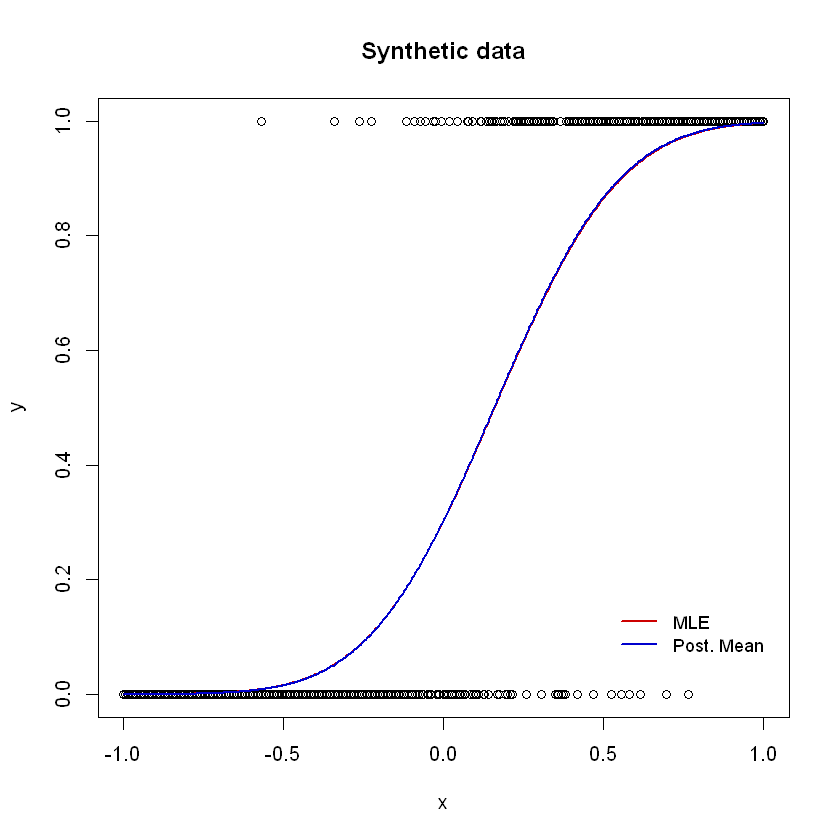

In [42]:
# ---------------------------
# Get posterior mean of \theta
# ---------------------------
# (Intercept)           x 
#  -0.5026835   3.2076024
(post_theta <- colMeans(theta_chain[-(1:burn_in), ]))

# Plot covariates x versus observations y
plot(x, y, main = "Synthetic data")
# Show the fitted function using the posterior mean estimates
lines(x = x, y = pnorm(X %*% mle_theta), col = "red3", lwd = 2)
lines(x = x, y = pnorm(X %*% post_theta), col = "blue3", lwd = 2)
legend("bottomright", legend=c("MLE","Post. Mean"), col=c("red3","blue3"), 
       bty = 'n', lwd = 2, inset = c(0.02, 0.08), lty = 1, cex = 0.9)

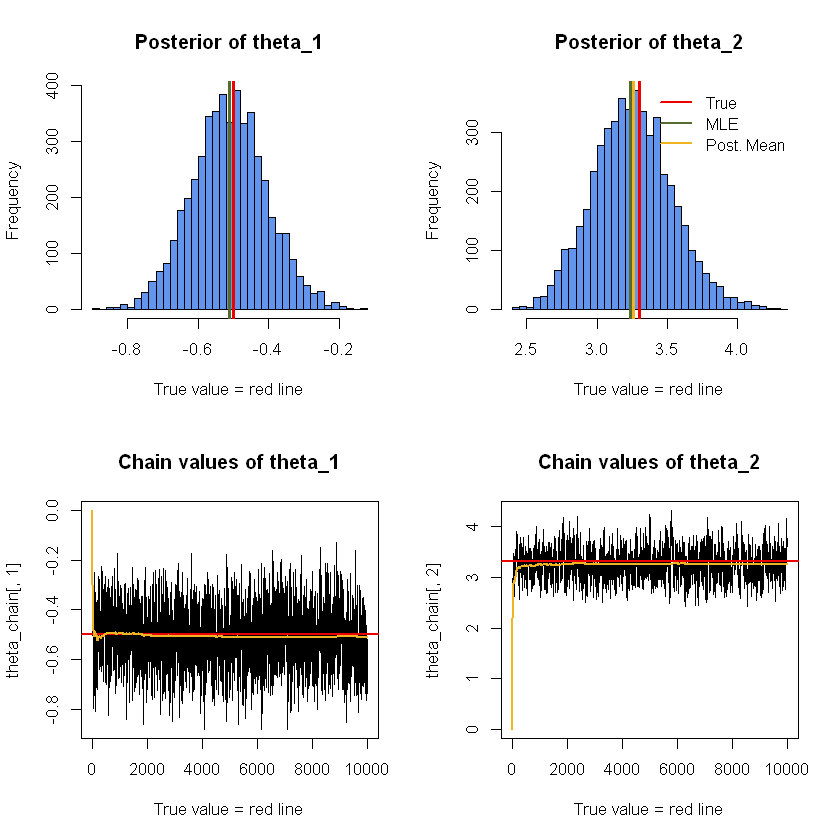

In [43]:
par(mfrow = c(2,2))
hist(theta_chain[-(1:burn_in),1],breaks=30, main="Posterior of theta_1", 
     xlab="True value = red line", col="cornflowerblue")
abline(v = post_theta[1], col="goldenrod2", lwd=3)
abline(v = true_theta[1], col="red2", lwd=3)
abline(v = mle_theta[1], col="darkolivegreen", lwd=3)
hist(theta_chain[-(1:burn_in),2], breaks=30, main="Posterior of theta_2", 
     xlab="True value = red line", col="cornflowerblue")
abline(v = post_theta[2], col="goldenrod2", lwd=3)
abline(v = true_theta[2], col="red2", lwd=3)
abline(v = mle_theta[2], col="darkolivegreen", lwd=3)
legend("topright", c("True", "MLE", "Post. Mean"), lty=1, lwd=2,
       col=c("red2", "darkolivegreen","goldenrod2"), bty='n', cex=.95)

plot(theta_chain[, 1], type = "l", xlab="True value = red line" , 
     main = "Chain values of theta_1")
abline(h = true_theta[1], col="red2", lwd=2)
lines(cumsum(theta_chain[, 1])/(1:N_sim), col="goldenrod2", lwd=2)
plot(theta_chain[, 2], type = "l", xlab="True value = red line" , 
     main = "Chain values of theta_2")
abline(h = true_theta[2], col="red2", lwd=2)
lines(cumsum(theta_chain[, 2])/(1:N_sim), col="goldenrod2", lwd=2)

## 0.4 Holmes and Held Extension

### 0.4.1 Algorithm implementation

In [44]:
# Compute the martix S = VX'
S <- tcrossprod(V, X)

h <- vector(mode = "numeric", length = N)
w <- vector(mode = "numeric", length = N)
u <- vector(mode = "numeric", length = N)
for (j in 1:N){
  # h stores the diagonal elements of the hat matrix (XS = XVX')
  h[j] <- X[j, ] %*% S[, j]
  w[j] <- h[j] / (1 - h[j])
  u[j] <- w[j] + 1
}

In [45]:
# Initialize latent variable Z, from truncated normal
z[y == 0] <- rtruncnorm(N0, mean = 0, sd = 1, a = -Inf, b = 0)
z[y == 1] <- rtruncnorm(N1, mean = 0, sd = 1, a = 0, b = Inf)

# Matrix storing samples of the \theta parameter
theta_chain_holmes <- matrix(0, nrow = N_sim, ncol = D)

In [46]:
# Gibbs sampling algorithm

In [47]:
# Compute the conditional mean of \theta
M <- as.vector(S %*% z)

for (t in 2:N_sim) {
  for (j in 1:N){
    # Store the old value of z
    z_old <- z[j]
    
    # Update mean of latent variable z_i
    m <- X[j, ] %*% M
    m <- m - w[j] * (z[j] - m)
    
    # Draw latent variable z from full conditional: z_j | z_-j, y, X
    if (y[j] == 0)
      z[j] <- rtruncnorm(1, mean = m, sd = u[j], a = -Inf, b = 0)
    else
      z[j] <- rtruncnorm(1, mean = m, sd = u[j], a = 0, b = Inf)
    
    # Update the posterior mean M
    M <- as.vector(M + (z[j] - z_old) %*% S[ ,j])
  }
  
  # Posterior of M | Z
  theta_chain_holmes[t, ] <- c(rmvnorm(1, M, V))
}

In [49]:
# ---------------------------
# Get posterior mean of \theta
# ---------------------------
# (Intercept)           x 
#  -0.5026835   3.2076024
(post_theta_holmes <- colMeans(theta_chain_holmes[-(1:burn_in), ]))

[1] -0.5188302  3.2685422